<a href="https://colab.research.google.com/github/layaart/Mydata/blob/main/resnet50_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
from google.colab import files
files.upload()


Saving best-artworks-of-all-time-metadata.json to best-artworks-of-all-time-metadata.json


{'best-artworks-of-all-time-metadata.json': b'{\n    "@context": {\n        "@language": "en",\n        "@vocab": "https://schema.org/",\n        "citeAs": "cr:citeAs",\n        "column": "cr:column",\n        "conformsTo": "dct:conformsTo",\n        "cr": "http://mlcommons.org/croissant/",\n        "data": {\n            "@id": "cr:data",\n            "@type": "@json"\n        },\n        "dataBiases": "cr:dataBiases",\n        "dataCollection": "cr:dataCollection",\n        "dataType": {\n            "@id": "cr:dataType",\n            "@type": "@vocab"\n        },\n        "dct": "http://purl.org/dc/terms/",\n        "extract": "cr:extract",\n        "field": "cr:field",\n        "fileProperty": "cr:fileProperty",\n        "fileObject": "cr:fileObject",\n        "fileSet": "cr:fileSet",\n        "format": "cr:format",\n        "includes": "cr:includes",\n        "isEnumeration": "cr:isEnumeration",\n        "jsonPath": "cr:jsonPath",\n        "key": "cr:key",\n        "md5": "cr:md5"

In [ ]:
json_path = '/content/best-artworks-of-all-time-metadata.json'

In [ ]:
with open(json_path, 'r') as f:
    data = json.load(f)

In [ ]:
# Directory path (assuming the JSON file is in the root directory /content)
directory_path = '/content/'

# List contents of the directory
print(os.listdir(directory_path))

['.config', 'best-artworks-of-all-time-metadata.json', 'sample_data']


In [ ]:
artists = pd.read_csv('/content/artists.csv')
artists.shape

(50, 8)

In [ ]:
# Sort artists by number of paintings
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 200 paintings
artists_top = artists[artists['paintings'] >= 200].reset_index()
artists_top = artists_top[['name', 'paintings']]
#artists_top['class_weight'] = max(artists_top.paintings)/artists_top.paintings
artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
artists_top

name  paintings  class_weight
0        Vincent van Gogh        877      0.445631
1             Edgar Degas        702      0.556721
2           Pablo Picasso        439      0.890246
3   Pierre-Auguste Renoir        336      1.163149
4          Albrecht Durer        328      1.191519
5            Paul Gauguin        311      1.256650
6          Francisco Goya        291      1.343018
7               Rembrandt        262      1.491672
8           Alfred Sisley        259      1.508951
9                  Titian        255      1.532620
10           Marc Chagall        239      1.635223

In [ ]:
# Set class weights - assign higher weights to underrepresented classes
class_weights = artists_top['class_weight'].to_dict()
class_weights

{0: 0.44563076604125634,
 1: 0.5567210567210568,
 2: 0.8902464278318493,
 3: 1.1631493506493507,
 4: 1.1915188470066518,
 5: 1.2566501023092662,
 6: 1.3430178069353327,
 7: 1.491672449687717,
 8: 1.5089505089505089,
 9: 1.532620320855615,
 10: 1.6352225180677062}

In [ ]:
updated_name = "Albrecht_Durer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name

In [ ]:
# Path to the JSON file
json_file_path = '/content/best-artworks-of-all-time-metadata.json'

# Load the JSON file
with open(json_file_path, 'r') as f:
    data = json.load(f)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

In [ ]:
# Path to your file in Google Drive
drive_file_path = '/content/drive/My Drive/images.zip'


In [ ]:
colab_destination_path = '/content/images.zip'


In [ ]:
# Copy the file from Drive to Colab
shutil.copy(drive_file_path, colab_destination_path)

'/content/images.zip'

In [ ]:
# Verify the copy by listing the files in the /content directory
print("Contents of /content:", os.listdir('/content'))

Contents of /content: ['.config', 'artists.csv', 'drive', 'best-artworks-of-all-time-metadata.json', 'images.zip', 'sample_data']


In [ ]:
import zipfile
import matplotlib.image as mpimg

# Path to the zip file
colab_zip_path = '/content/images.zip'

# Directory where the images will be extracted
extract_dir = '/content'
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(colab_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
print("Extracted files:", os.listdir(extract_dir)[:10])  # Print the first 10 files

# Display the images
image_files = [f for f in os.listdir(extract_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
for image_file in image_files[:5]:  # Adjust the range as needed
    img_path = os.path.join(extract_dir, image_file)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Extracted files: ['.config', 'images', 'artists.csv', 'drive', 'best-artworks-of-all-time-metadata.json', 'images.zip', 'sample_data']


In [ ]:
# There is some problem recognizing 'Albrecht_Dürer' (don't know why, worth exploring)
# So I'll update this string as directory name to df's
updated_name = "Albrecht_Durer".replace("_", " ")
artists_top.iloc[4, 0] = updated_name

Normalized directories in images_dir: ['Andrei_Rublev', 'Claude_Monet', 'Jackson_Pollock', 'Francisco_Goya', 'Diego_Rivera', 'Frida_Kahlo', 'Paul_Cezanne', 'Sandro_Botticelli', 'Marc_Chagall', 'Amedeo_Modigliani', 'El_Greco', 'Paul_Klee', 'Pablo_Picasso', 'Raphael', 'Mikhail_Vrubel', 'Rene_Magritte', 'Edgar_Degas', 'Andy_Warhol', 'Alfred_Sisley', 'Edouard_Manet', 'Hieronymus_Bosch', 'Pierre-Auguste_Renoir', 'Leonardo_da_Vinci', 'Eugene_Delacroix', 'Diego_Velazquez', 'Edvard_Munch', 'Caravaggio', 'Henri_de_Toulouse-Lautrec', 'Albrecht_Durer', 'William_Turner', 'Jan_van_Eyck', 'Salvador_Dali', 'Joan_Miro', 'Vincent_van_Gogh', 'Paul_Gauguin', 'Michelangelo', 'Henri_Matisse', 'Kazimir_Malevich', 'Vasiliy_Kandinskiy', 'Pieter_Bruegel', 'Piet_Mondrian', 'Gustav_Klimt', 'Georges_Seurat', 'Titian', 'Peter_Paul_Rubens', 'Camille_Pissarro', 'Giotto_di_Bondone', 'Gustave_Courbet', 'Rembrandt', 'Henri_Rousseau']


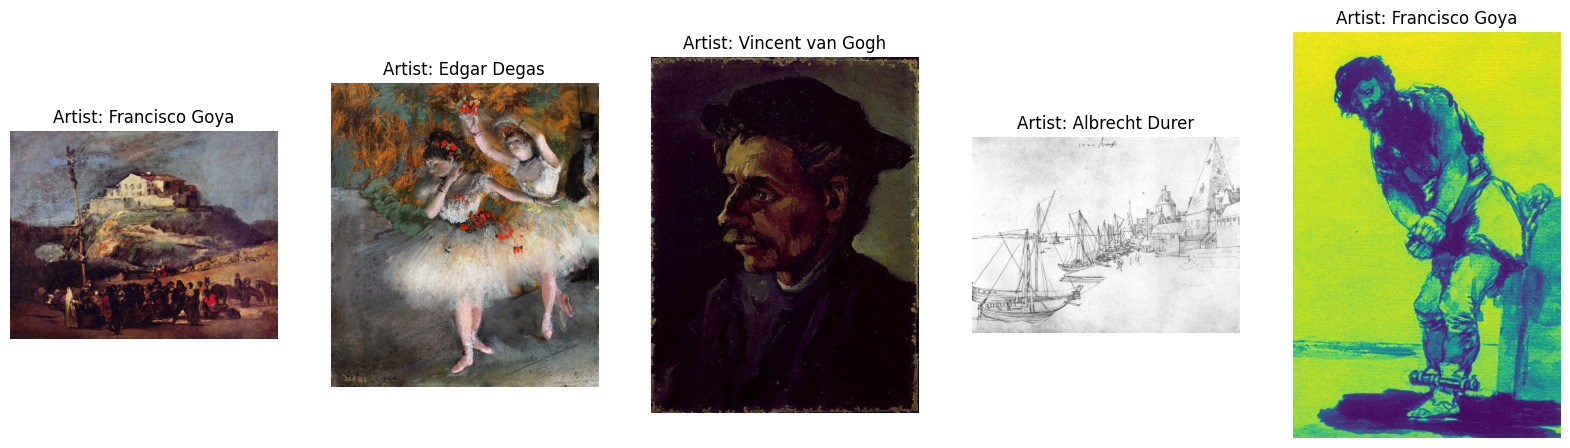

In [ ]:
from text_unidecode import unidecode
import matplotlib.pyplot as plt
import random

# Example DataFrame, replace with your actual DataFrame
data = {
    'name': [
        'Vincent van Gogh', 'Edgar Degas', 'Pablo Picasso', 'Pierre-Auguste Renoir',
        'Albrecht Durer', 'Paul Gauguin', 'Francisco Goya', 'Rembrandt',
        'Alfred Sisley', 'Titian', 'Marc Chagall'
    ]
}
artists_top = pd.DataFrame(data)

# Update the name for "Albrecht Dürer"
updated_name = "Albrecht_Durer".replace("_", " ")  # Update with specific encoding
artists_top.iloc[4, 0] = updated_name

# Directory containing artist images
images_dir ="/content/images/images"

# List and normalize all directories in the images directory
directories = os.listdir(images_dir)
normalized_directories = [unidecode(d).replace(' ', '_') for d in directories]
print("Normalized directories in images_dir:", normalized_directories)

# Replace spaces and handle special characters in artist names
artists_top_name = artists_top['name'].str.replace(' ', '_').values
normalized_artists_top_name = [unidecode(name) for name in artists_top_name]

# Manually handle the specific case for "Albrecht Dürer"
normalized_artists_top_name = [name.replace('ü', 'u') for name in normalized_artists_top_name]

# Specific mapping for the problematic case
specific_mappings = {
    'Albrecht_Durer': 'Albrecht_Durer'
}

# Create a mapping from artist names to directories
artist_dir_mapping = {name: specific_mappings.get(name, name) for name in normalized_artists_top_name}

# Print few random paintings
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(list(artist_dir_mapping.keys()))
    artist_dir = artist_dir_mapping[random_artist]
    random_image = random.choice(os.listdir(os.path.join(images_dir, artist_dir)))
    random_image_file = os.path.join(images_dir, artist_dir, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()


In [ ]:
import pkg_resources
installed_packages = pkg_resources.working_set
packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
print(packages_list)

['absl-py==1.4.0', 'aiohttp==3.9.5', 'aiosignal==1.3.1', 'alabaster==0.7.16', 'albumentations==1.3.1', 'altair==4.2.2', 'annotated-types==0.7.0', 'anyio==3.7.1', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==23.1.0', 'array-record==0.5.1', 'arviz==0.15.1', 'astropy==5.3.4', 'astunparse==1.6.3', 'async-timeout==4.0.3', 'atpublic==4.1.0', 'attrs==23.2.0', 'audioread==3.0.1', 'autograd==1.6.2', 'babel==2.15.0', 'backcall==0.2.0', 'beautifulsoup4==4.12.3', 'bidict==0.23.1', 'bigframes==1.8.0', 'bleach==6.1.0', 'blinker==1.4', 'blis==0.7.11', 'blosc2==2.0.0', 'bokeh==3.3.4', 'bqplot==0.12.43', 'branca==0.7.2', 'build==1.2.1', 'cachecontrol==0.14.0', 'cachetools==5.3.3', 'catalogue==2.0.10', 'certifi==2024.6.2', 'cffi==1.16.0', 'chardet==5.2.0', 'charset-normalizer==3.3.2', 'chex==0.1.86', 'click-plugins==1.1.1', 'click==8.1.7', 'cligj==0.7.2', 'cloudpathlib==0.16.0', 'cloudpickle==2.2.1', 'cmake==3.27.9', 'cmdstanpy==1.2.3', 'colorcet==3.1.0', 'colorlover==0.3.0', 'colour==0.1.5', 'communit

In [ ]:
installed_packages = pkg_resources.working_set
packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
print(packages_list)

['absl-py==1.4.0', 'aiohttp==3.9.5', 'aiosignal==1.3.1', 'alabaster==0.7.16', 'albumentations==1.3.1', 'altair==4.2.2', 'annotated-types==0.7.0', 'anyio==3.7.1', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==23.1.0', 'array-record==0.5.1', 'arviz==0.15.1', 'astropy==5.3.4', 'astunparse==1.6.3', 'async-timeout==4.0.3', 'atpublic==4.1.0', 'attrs==23.2.0', 'audioread==3.0.1', 'autograd==1.6.2', 'babel==2.15.0', 'backcall==0.2.0', 'beautifulsoup4==4.12.3', 'bidict==0.23.1', 'bigframes==1.8.0', 'bleach==6.1.0', 'blinker==1.4', 'blis==0.7.11', 'blosc2==2.0.0', 'bokeh==3.3.4', 'bqplot==0.12.43', 'branca==0.7.2', 'build==1.2.1', 'cachecontrol==0.14.0', 'cachetools==5.3.3', 'catalogue==2.0.10', 'certifi==2024.6.2', 'cffi==1.16.0', 'chardet==5.2.0', 'charset-normalizer==3.3.2', 'chex==0.1.86', 'click-plugins==1.1.1', 'click==8.1.7', 'cligj==0.7.2', 'cloudpathlib==0.16.0', 'cloudpickle==2.2.1', 'cmake==3.27.9', 'cmdstanpy==1.2.3', 'colorcet==3.1.0', 'colorlover==0.3.0', 'colour==0.1.5', 'communit

In [ ]:
# List and print all directories in the images directory

directories = os.listdir(images_dir)
print("Directories in images_dir:", directories)


Directories in images_dir: ['Andrei_Rublev', 'Claude_Monet', 'Jackson_Pollock', 'Francisco_Goya', 'Diego_Rivera', 'Frida_Kahlo', 'Paul_Cezanne', 'Sandro_Botticelli', 'Marc_Chagall', 'Amedeo_Modigliani', 'El_Greco', 'Paul_Klee', 'Pablo_Picasso', 'Raphael', 'Mikhail_Vrubel', 'Rene_Magritte', 'Edgar_Degas', 'Andy_Warhol', 'Alfred_Sisley', 'Edouard_Manet', 'Hieronymus_Bosch', 'Pierre-Auguste_Renoir', 'Leonardo_da_Vinci', 'Eugene_Delacroix', 'Diego_Velazquez', 'Edvard_Munch', 'Caravaggio', 'Henri_de_Toulouse-Lautrec', 'Albrecht_Durer', 'William_Turner', 'Jan_van_Eyck', 'Salvador_Dali', 'Joan_Miro', 'Vincent_van_Gogh', 'Paul_Gauguin', 'Michelangelo', 'Henri_Matisse', 'Kazimir_Malevich', 'Vasiliy_Kandinskiy', 'Pieter_Bruegel', 'Piet_Mondrian', 'Gustav_Klimt', 'Georges_Seurat', 'Titian', 'Peter_Paul_Rubens', 'Camille_Pissarro', 'Giotto_di_Bondone', 'Gustave_Courbet', 'Rembrandt', 'Henri_Rousseau']


In [ ]:
# Augment data
batch_size = 16
train_input_shape = (224, 224, 3)
n_classes = artists_top.shape[0]

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale=1./255.,
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   shear_range=5,
                                   #zoom_range=0.7,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  )

train_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

valid_generator = train_datagen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_top_name.tolist()
                                                   )

STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
print("Total number of batches =", STEP_SIZE_TRAIN, "and", STEP_SIZE_VALID)

Found 3444 images belonging to 11 classes.
Found 855 images belonging to 11 classes.
Total number of batches = 215 and 53


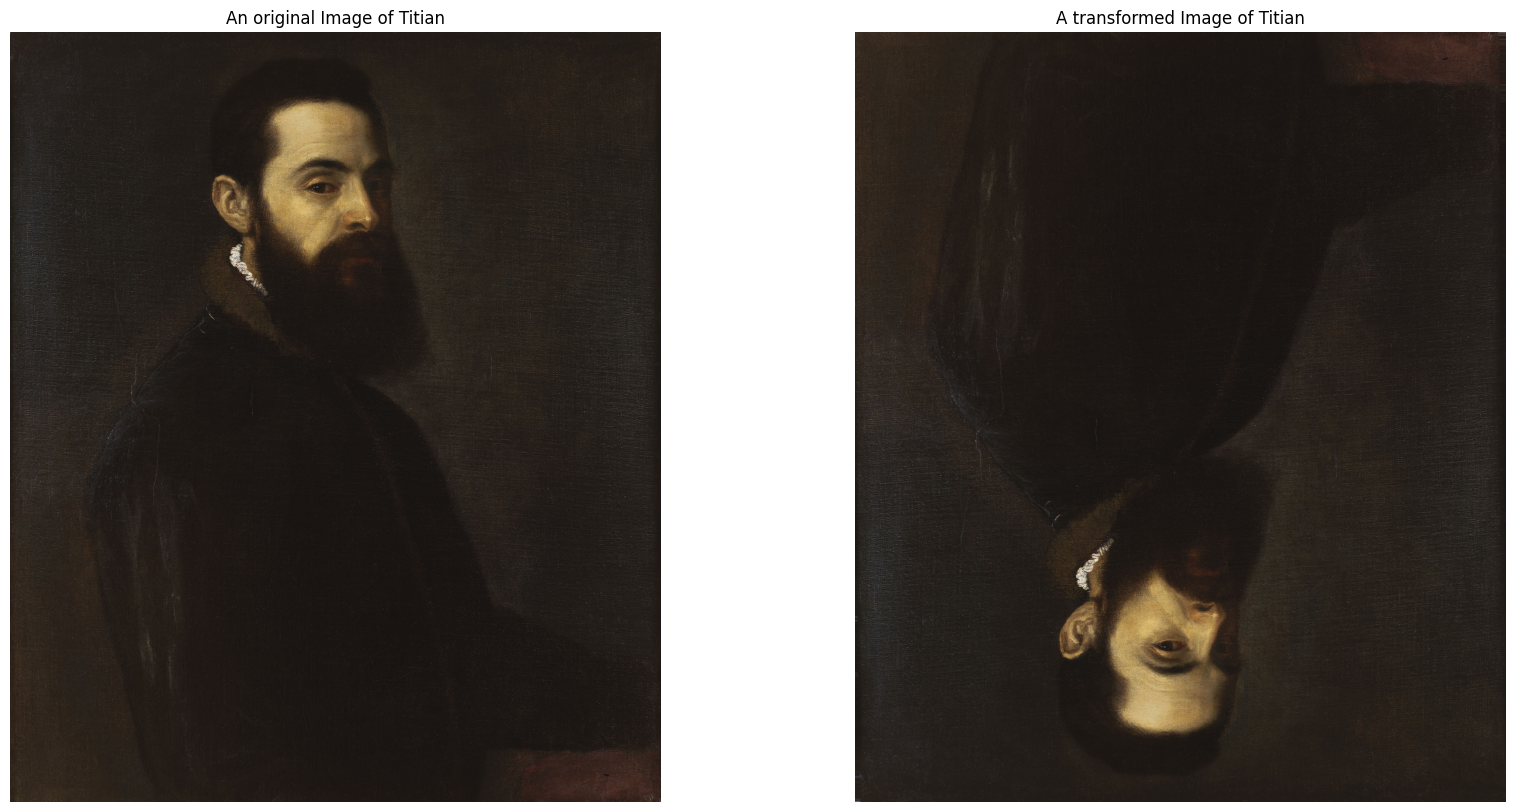

In [ ]:
# Print a random paintings and it's random augmented version
fig, axes = plt.subplots(1, 2, figsize=(20,10))

random_artist = random.choice(artists_top_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)

# Original image
image = plt.imread(random_image_file)
axes[0].imshow(image)
axes[0].set_title("An original Image of " + random_artist.replace('_', ' '))
axes[0].axis('off')

# Transformed image
aug_image = train_datagen.random_transform(image)
axes[1].imshow(aug_image)
axes[1].set_title("A transformed Image of " + random_artist.replace('_', ' '))
axes[1].axis('off')

plt.show()

In [ ]:
# Load pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

for layer in base_model.layers:
    layer.trainable = True

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Add layers at the end
X = base_model.output
X = Flatten()(X)

X = Dense(512, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

X = Dense(16, kernel_initializer='he_uniform')(X)
#X = Dropout(0.5)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)

output = Dense(n_classes, activation='softmax')(X)

model = Model(inputs=base_model.input, outputs=output)

In [ ]:
optimizer = SGD(learning_rate=0.0001, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

In [ ]:
# Train the model - all layers
history1 = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator, validation_steps=STEP_SIZE_VALID,
                              epochs=n_epoch,
                              shuffle=True,
                              verbose=1,
                              callbacks=[reduce_lr],
                              use_multiprocessing=True,
                              workers=16,
                              class_weight=class_weights
                             )

Epoch 1/30


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


215/215 [==============================] - 157s 575ms/step - loss: 1.9882 - accuracy: 0.3264 - val_loss: 2.8356 - val_accuracy: 0.0601 - lr: 1.0000e-04
Epoch 2/30
215/215 [==============================] - 120s 540ms/step - loss: 1.5621 - accuracy: 0.5058 - val_loss: 2.7471 - val_accuracy: 0.0873 - lr: 1.0000e-04
Epoch 3/30
215/215 [==============================] - 118s 520ms/step - loss: 1.4019 - accuracy: 0.5683 - val_loss: 2.6820 - val_accuracy: 0.1663 - lr: 1.0000e-04
Epoch 4/30
215/215 [==============================] - 116s 525ms/step - loss: 1.3080 - accuracy: 0.6109 - val_loss: 2.3742 - val_accuracy: 0.2830 - lr: 1.0000e-04
Epoch 5/30
215/215 [==============================] - 126s 570ms/step - loss: 1.2239 - accuracy: 0.6558 - val_loss: 1.6253 - val_accuracy: 0.5318 - lr: 1.0000e-04
Epoch 6/30
215/215 [==============================] - 130s 575ms/step - loss: 1.1359 - accuracy: 0.6823 - val_loss: 1.3298 - val_accuracy: 0.6663 - lr: 1.0000e-04
Epoch 7/30
215/215 [=============

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history1.history)

# Save to CSV file.
history_df.to_csv("/content/training_history_2.csv", index=False)





In [ ]:

history = {}


history['loss'] = history1.history['loss']
history['accuracy'] = history1.history['accuracy']
history['val_loss'] = history1.history['val_loss']
history['val_accuracy'] = history1.history['val_accuracy']

if 'lr' in history1.history:
    history['learning_rate'] = history1.history['lr']

if 'precision' in history1.history:
     history['precision'] = history1.history['precision']
if 'recall' in history1.history:
     history['recall'] = history1.history['recall']






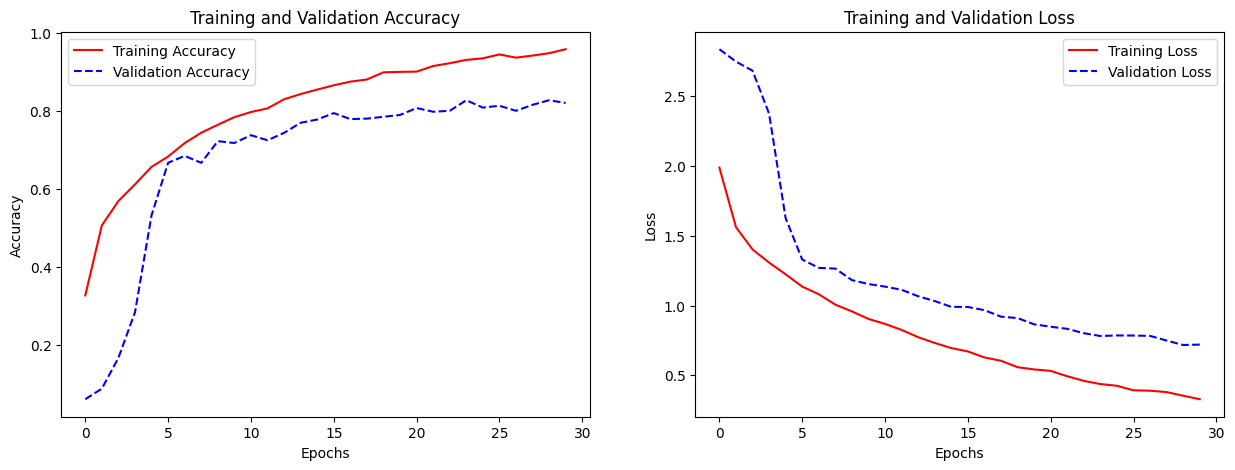

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='best')

    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend(loc='best')

    plt.show()

plot_training(history)


In [ ]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

<ipython-input-65-1dfa5047d603>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(train_generator, verbose=1)


216/216 [==============================] - 69s 319ms/step - loss: 0.2158 - accuracy: 0.9901
Prediction accuracy on train data = 0.9901277422904968


In [ ]:
# Prediction accuracy on CV data
score = model.evaluate_generator(valid_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])


<ipython-input-67-d4a6d1ee285c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(valid_generator, verbose=1)


54/54 [==============================] - 17s 319ms/step - loss: 0.7120 - accuracy: 0.8199
Prediction accuracy on CV data = 0.8198830485343933


1/1 [==============================] - 0s 26ms/step


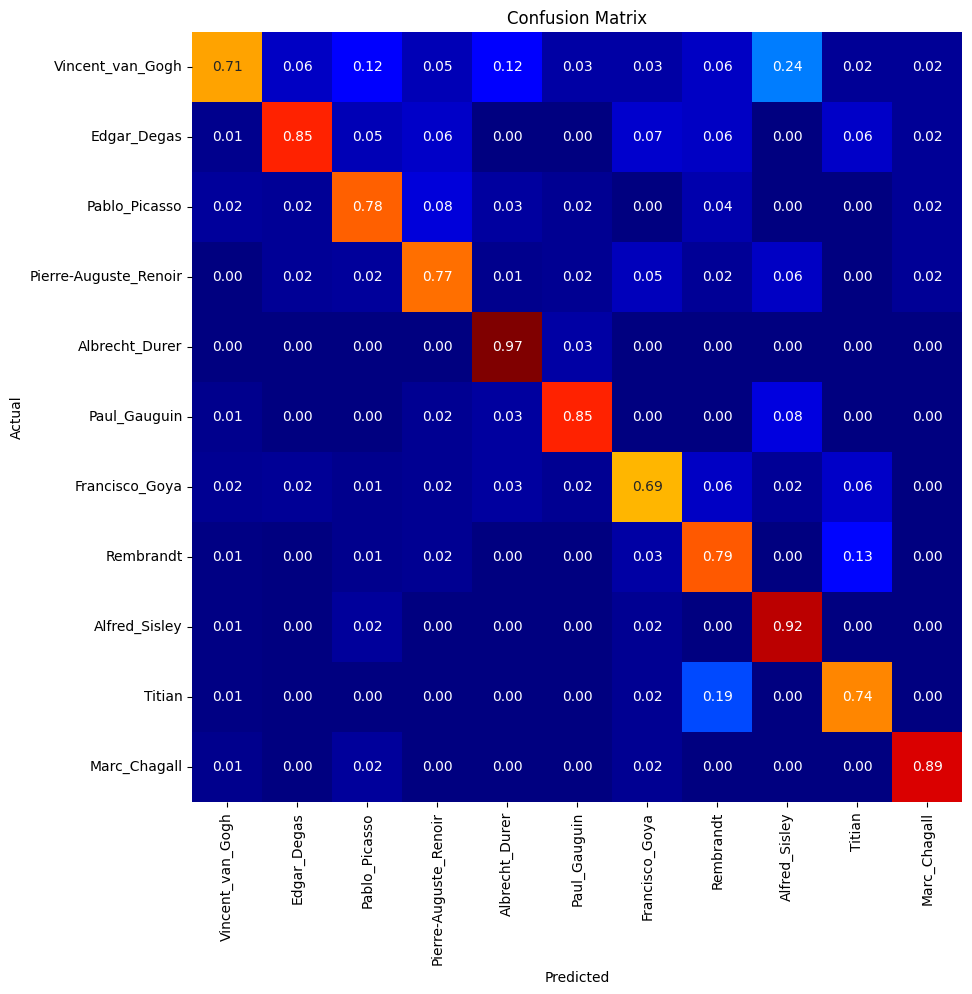

Classification Report:
                       precision    recall  f1-score   support

     Vincent_van_Gogh       0.89      0.71      0.79       174
          Edgar_Degas       0.87      0.85      0.86       137
        Pablo_Picasso       0.75      0.78      0.76        83
Pierre-Auguste_Renoir       0.77      0.77      0.77        64
       Albrecht_Durer       0.81      0.97      0.88        67
         Paul_Gauguin       0.88      0.85      0.86        59
       Francisco_Goya       0.75      0.69      0.72        59
            Rembrandt       0.65      0.79      0.71        52
        Alfred_Sisley       0.70      0.92      0.79        50
               Titian       0.73      0.74      0.74        47
         Marc_Chagall       0.91      0.89      0.90        47

             accuracy                           0.80       839
            macro avg       0.79      0.82      0.80       839
         weighted avg       0.81      0.80      0.80       839



In [ ]:
# Classification report and confusion matrix
from sklearn.metrics import *
import seaborn as sns

tick_labels = artists_top_name.tolist()

def showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID):
    # Loop on each generator batch and predict
    y_pred, y_true = [], []
    for i in range(STEP_SIZE_VALID):
        (X,y) = next(valid_generator)
        y_pred.append(model.predict(X))
        y_true.append(y)

    # Create a flat list for y_true and y_pred
    y_pred = [subresult for result in y_pred for subresult in result]
    y_true = [subresult for result in y_true for subresult in result]

    # Update Truth vector based on argmax
    y_true = np.argmax(y_true, axis=1)
    y_true = np.asarray(y_true).ravel()

    # Update Prediction vector based on argmax
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = np.asarray(y_pred).ravel()

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10,10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=artists_top_name.tolist()))

showClassficationReport_Generator(model, valid_generator, STEP_SIZE_VALID)

1/1 [==============================] - 0s 22ms/step


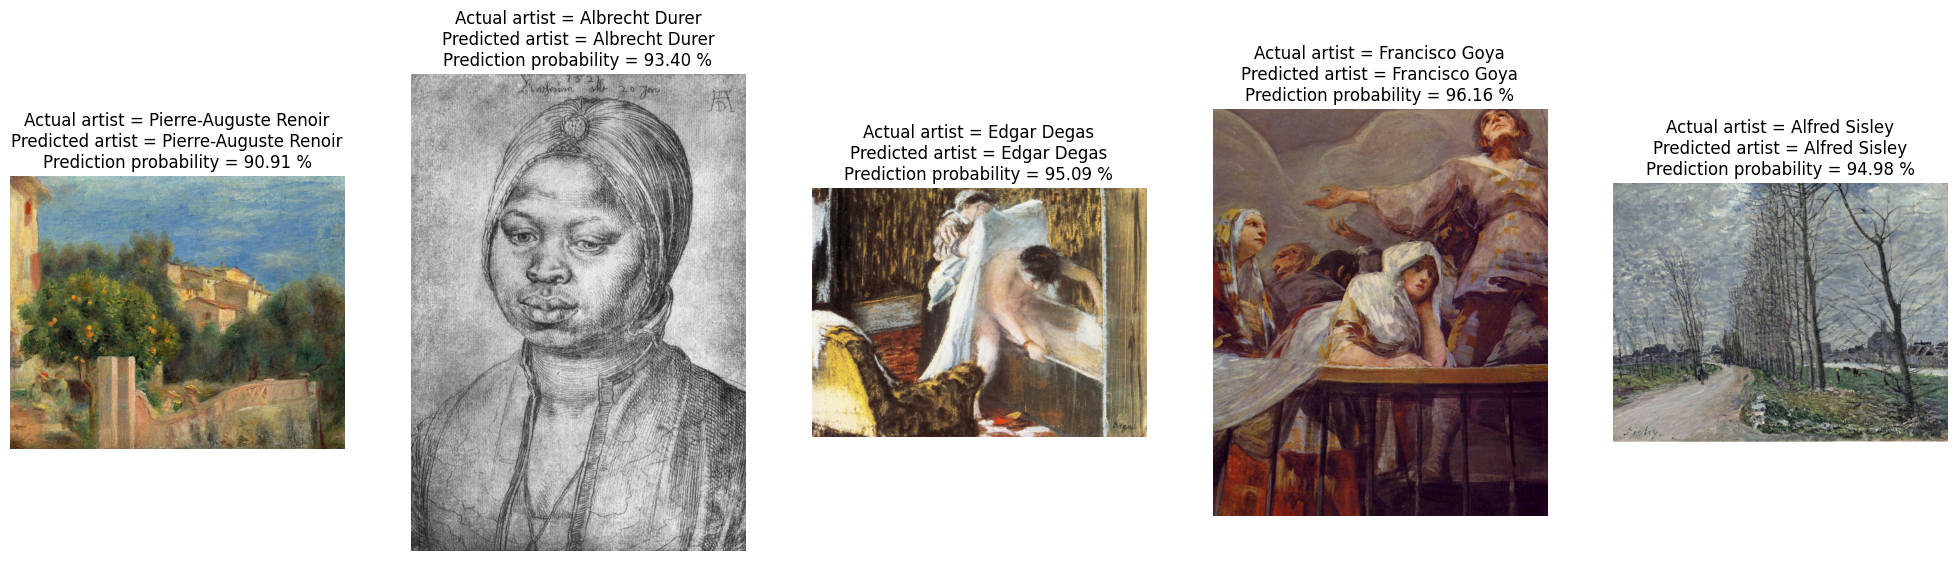

In [ ]:
# Prediction
from keras.preprocessing import *

n = 5
fig, axes = plt.subplots(1, n, figsize=(25,10))

for i in range(n):
    random_artist = random.choice(artists_top_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)

    # Original image

    test_image = image.load_img(random_image_file, target_size=(train_input_shape[0:2]))

    # Predict artist
    test_image = image.img_to_array(test_image)
    test_image /= 255.
    test_image = np.expand_dims(test_image, axis=0)

    prediction = model.predict(test_image)
    prediction_probability = np.amax(prediction)
    prediction_idx = np.argmax(prediction)

    labels = train_generator.class_indices
    labels = dict((v,k) for k,v in labels.items())

    #print("Actual artist =", random_artist.replace('_', ' '))
    #print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
    #print("Prediction probability =", prediction_probability*100, "%")

    title = "Actual artist = {}\nPredicted artist = {}\nPrediction probability = {:.2f} %" \
                .format(random_artist.replace('_', ' '), labels[prediction_idx].replace('_', ' '),
                        prediction_probability*100)

    # Print image
    axes[i].imshow(plt.imread(random_image_file))
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

<ipython-input-73-2103ed001bba>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 105ms/step
Predicted artist = Titian
Prediction probability = 45.33052742481232 %


<ipython-input-73-2103ed001bba>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


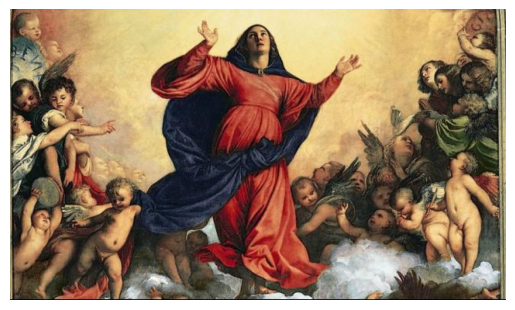

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'https://www.gpsmycity.com/img/gd/2081.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

<ipython-input-75-a07cb1ac6bcf>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 73ms/step
Predicted artist = Pablo Picasso
Prediction probability = 27.643755078315735 %


<ipython-input-75-a07cb1ac6bcf>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


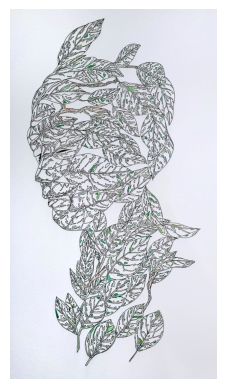

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/pic3.jpeg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

<ipython-input-79-5476f4fad16e>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 43ms/step
Predicted artist = Titian
Prediction probability = 88.50654363632202 %


<ipython-input-79-5476f4fad16e>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


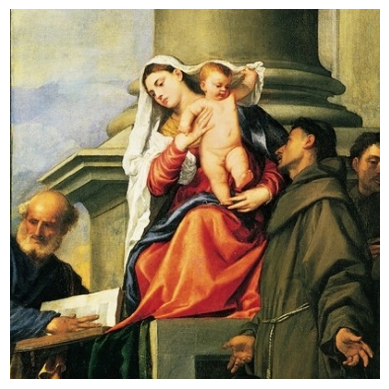

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = 'http://www.italianrenaissance.org/wp-content/uploads/2012/07/Titian-Pesaro-Madonna-detail1.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

<ipython-input-86-14f34e6ef7c8>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 [==============================] - 0s 36ms/step
Predicted artist = Marc Chagall
Prediction probability = 35.7976496219635 %


<ipython-input-86-14f34e6ef7c8>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


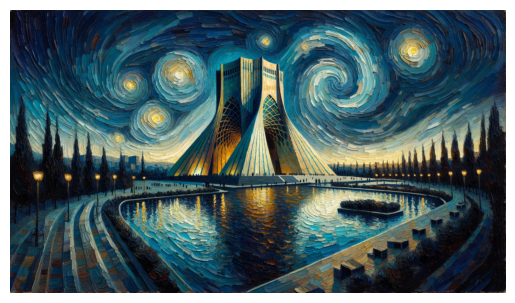

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/5ee6c829-3250-46d5-a167-22131d5e583e.webp'
import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 23ms/step


<ipython-input-87-fb3a95665af3>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-87-fb3a95665af3>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Francisco Goya
Prediction probability = 30.769288539886475 %


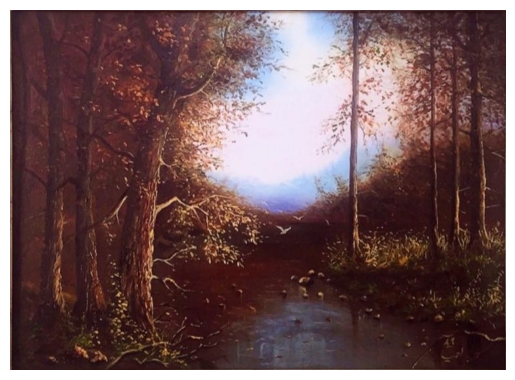

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/pic1.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 22ms/step


<ipython-input-88-2ded78c0d079>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)
<ipython-input-88-2ded78c0d079>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


Predicted artist = Alfred Sisley
Prediction probability = 19.750723242759705 %


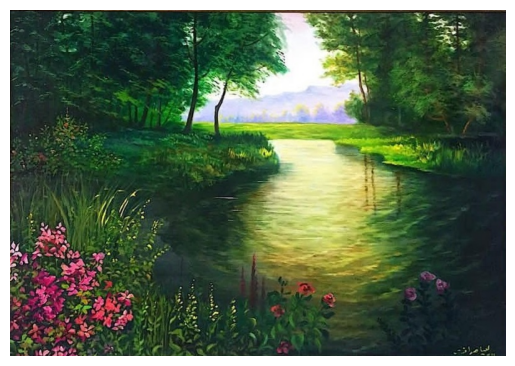

In [ ]:
# Predict from web - this is an image of Titian.
# Replace 'url' with any image of one of the 11 artists above and run this cell.
url = '/content/pic2.jpg'

import imageio
import cv2

web_image = imageio.imread(url)
web_image = cv2.resize(web_image, dsize=train_input_shape[0:2], )
web_image = image.img_to_array(web_image)
web_image /= 255.
web_image = np.expand_dims(web_image, axis=0)


prediction = model.predict(web_image)
prediction_probability = np.amax(prediction)
prediction_idx = np.argmax(prediction)

print("Predicted artist =", labels[prediction_idx].replace('_', ' '))
print("Prediction probability =", prediction_probability*100, "%")

plt.imshow(imageio.imread(url))
plt.axis('off')
plt.show()

In [ ]:
# Check available layer names in the model
for layer in model.layers:
    print(layer.name)


input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

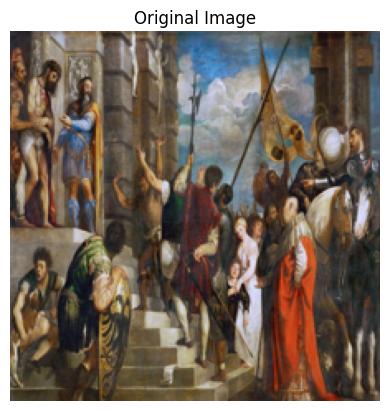

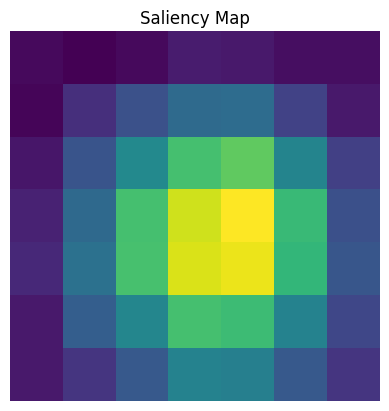

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((224, 224))  # Resize the image to match the input size for the model
    img = np.array(img) / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Load and preprocess the specific image
img_path = "/content/images/images/Titian/Titian_1.jpg"
img_data = load_and_preprocess_image(img_path)

# Display the original image
plt.figure()
plt.imshow(img_data)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Add batch dimension
img_data = np.expand_dims(img_data, axis=0)

# Generate saliency map
saliency_map = grad_cam(model, img_data, layer_name, num_classes)

# Display saliency map
plt.figure()
plt.imshow(saliency_map)
plt.title('Saliency Map')
plt.axis('off')
plt.show()
